# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "MRI-CGCM3"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/huss_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.7151014804840088 to load the data
*********Start to merge*********
It takes elapsed_time 0.031685590744018555 to merge the time series
*********Start to build the regridder*********
Create weight file: patch_160x320_192x288_peri.nc
It takes elapsed_time 28.65431523323059 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.395005702972412 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6553456783294678 to mask the layer
*********Start to plot the layer*********


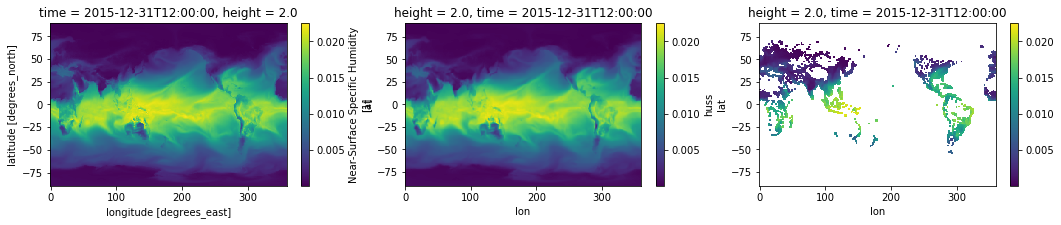

It takes elapsed_time 0.7403042316436768 to plot the layer
It takes elapsed_time 46.19265127182007 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/tas_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.174053430557251 to load the data
*********Start to merge*********
It takes elapsed_time 0.03016376495361328 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03143024444580078 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.302652359008789 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6572864055633545 to mask the layer
*********Start to plot the layer*********


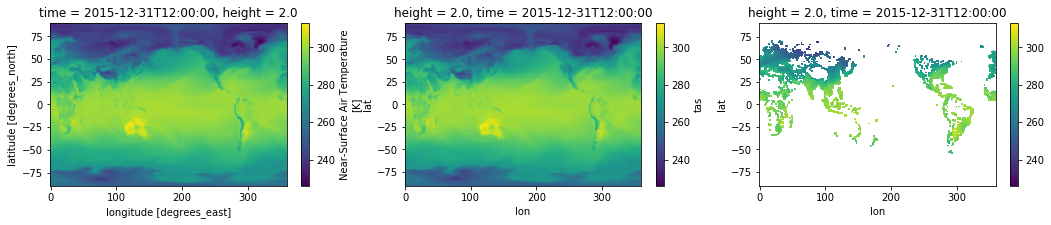

It takes elapsed_time 0.7065474987030029 to plot the layer
It takes elapsed_time 16.9029803276062 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/uas_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.4097821712493896 to load the data
*********Start to merge*********
It takes elapsed_time 0.031178951263427734 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.07819414138793945 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.30631136894226 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6559667587280273 to mask the layer
*********Start to plot the layer*********


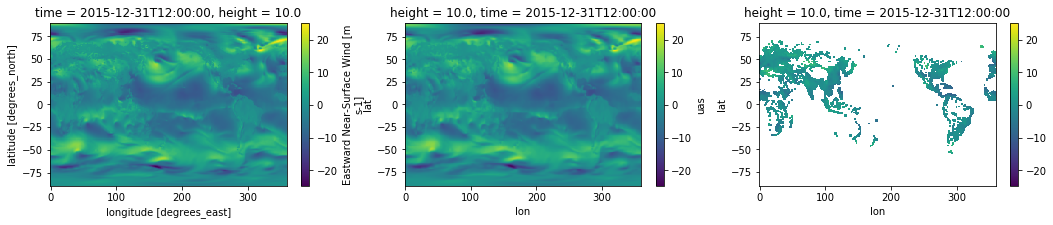

It takes elapsed_time 0.729323148727417 to plot the layer
It takes elapsed_time 17.2124764919281 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/vas_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.5216197967529297 to load the data
*********Start to merge*********
It takes elapsed_time 0.03284740447998047 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03189659118652344 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.282212018966675 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6565406322479248 to mask the layer
*********Start to plot the layer*********


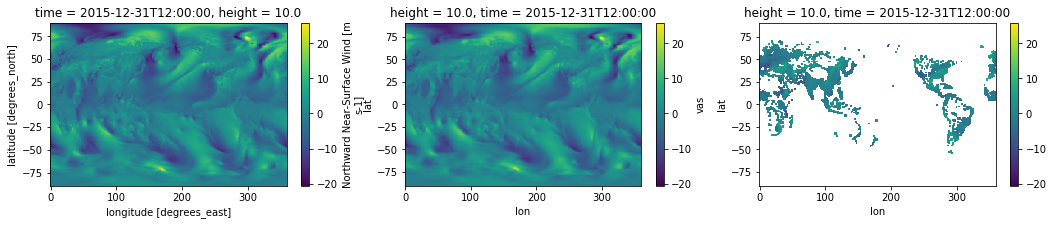

It takes elapsed_time 0.7342047691345215 to plot the layer
It takes elapsed_time 17.260165214538574 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/pr_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.6574690341949463 to load the data
*********Start to merge*********
It takes elapsed_time 0.03750324249267578 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.0331728458404541 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.317405939102173 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6519443988800049 to mask the layer
*********Start to plot the layer*********


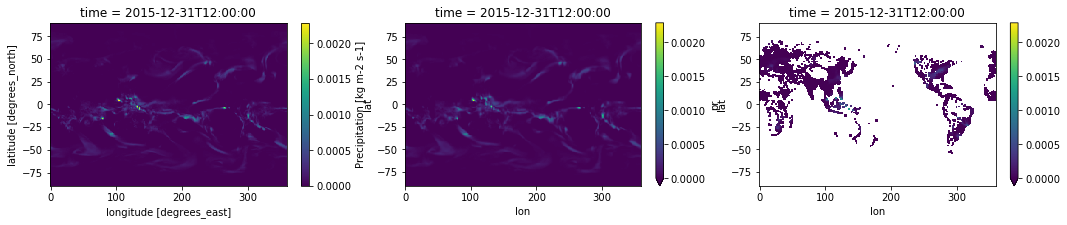

It takes elapsed_time 0.6668136119842529 to plot the layer
It takes elapsed_time 17.365341663360596 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/prsn_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.9496028423309326 to load the data
*********Start to merge*********
It takes elapsed_time 0.03591012954711914 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.031735897064208984 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.304855823516846 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6559598445892334 to mask the layer
*********Start to plot the layer*********


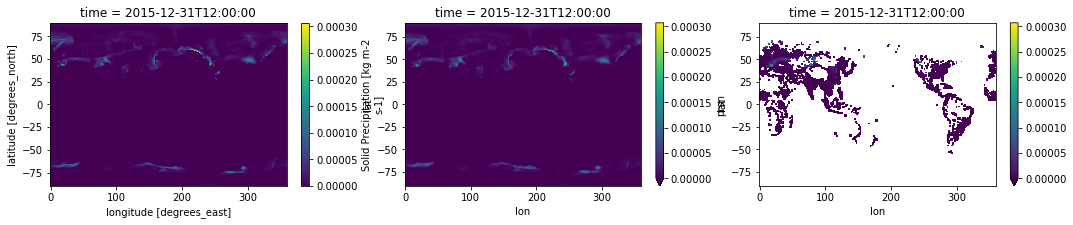

It takes elapsed_time 0.6764495372772217 to plot the layer
It takes elapsed_time 17.656673669815063 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rlds_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.050945520401001 to load the data
*********Start to merge*********
It takes elapsed_time 0.04074382781982422 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.09575200080871582 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.276934146881104 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6521475315093994 to mask the layer
*********Start to plot the layer*********


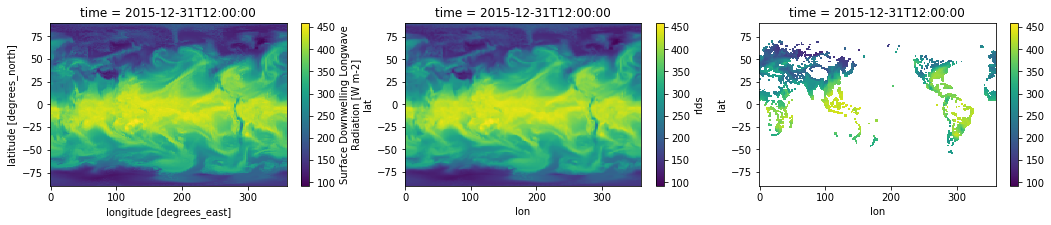

It takes elapsed_time 0.7384681701660156 to plot the layer
It takes elapsed_time 16.85621738433838 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rlus_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.4262213706970215 to load the data
*********Start to merge*********
It takes elapsed_time 0.03623557090759277 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.032337188720703125 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.258857488632202 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6515293121337891 to mask the layer
*********Start to plot the layer*********


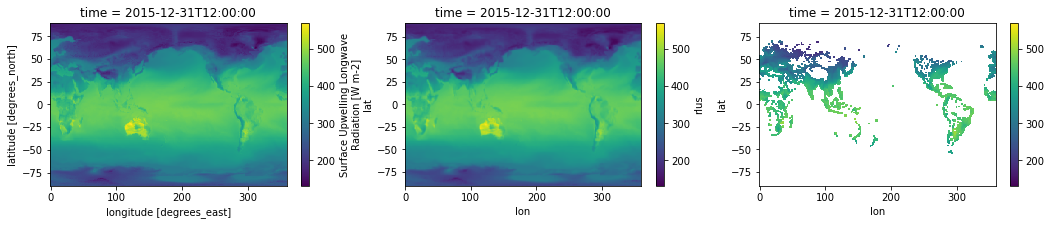

It takes elapsed_time 0.695624589920044 to plot the layer
It takes elapsed_time 17.101879596710205 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rsds_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.6232318878173828 to load the data
*********Start to merge*********
It takes elapsed_time 0.03599953651428223 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.05989384651184082 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.298097610473633 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6648046970367432 to mask the layer
*********Start to plot the layer*********


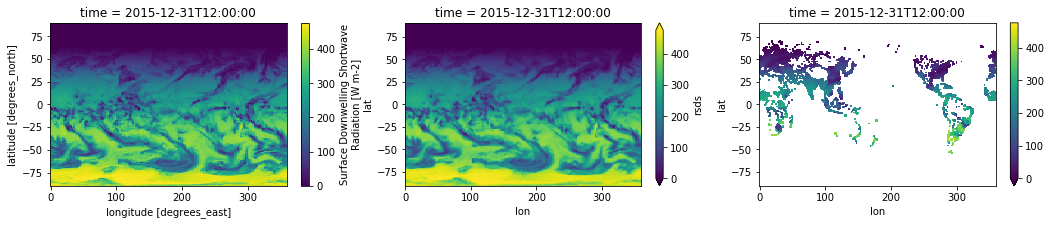

It takes elapsed_time 0.69881272315979 to plot the layer
It takes elapsed_time 17.382582187652588 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rsus_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc
It takes elapsed_time 1.752199649810791 to load the data
*********Start to merge*********
It takes elapsed_time 0.03852343559265137 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.032988786697387695 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 14.456016778945923 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6612391471862793 to mask the layer
*********Start to plot the layer*********


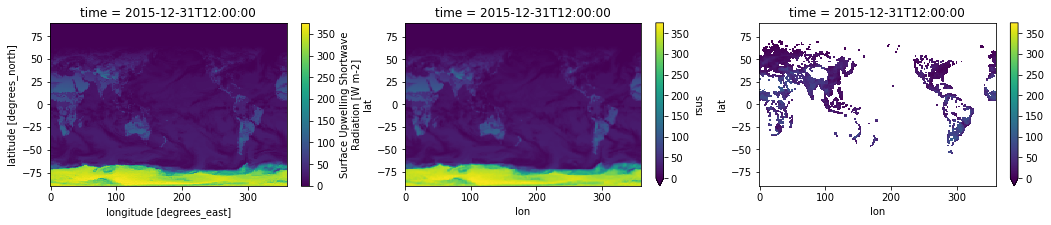

It takes elapsed_time 0.7517342567443848 to plot the layer
It takes elapsed_time 17.69355583190918 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2016, 10)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 33.406785011291504 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

235.02029538154602


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/huss_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 3.5060648918151855 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/huss_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 6.835383415222168 to load the data
*********Start to merge*********
It takes elapsed_time 8.822649002075195 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.13246536254882812 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.074869155883789 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6534371376037598 to mask the layer
*********Start to plot the layer*********


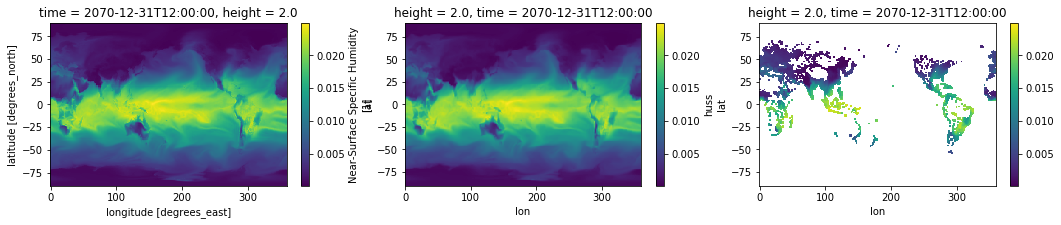

It takes elapsed_time 0.6990997791290283 to plot the layer
It takes elapsed_time 30.22023057937622 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/tas_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 3.754101037979126 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/tas_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 7.985092401504517 to load the data
*********Start to merge*********
It takes elapsed_time 9.083695888519287 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03316044807434082 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.079760313034058 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6573309898376465 to mask the layer
*********Start to plot the layer*********


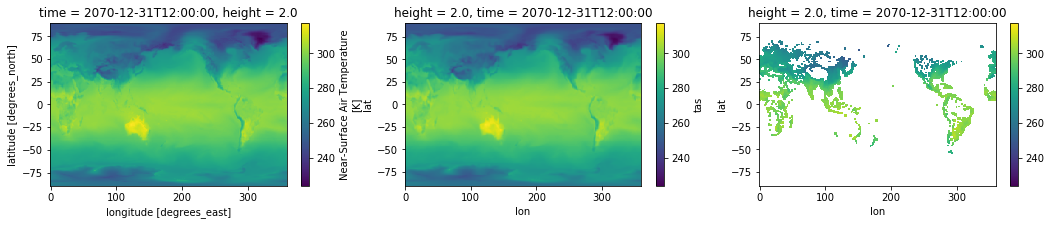

It takes elapsed_time 0.6950020790100098 to plot the layer
It takes elapsed_time 31.53582739830017 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/uas_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 3.791179656982422 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/uas_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 7.393450021743774 to load the data
*********Start to merge*********
It takes elapsed_time 8.66417121887207 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.12787294387817383 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.104892253875732 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.656907320022583 to mask the layer
*********Start to plot the layer*********


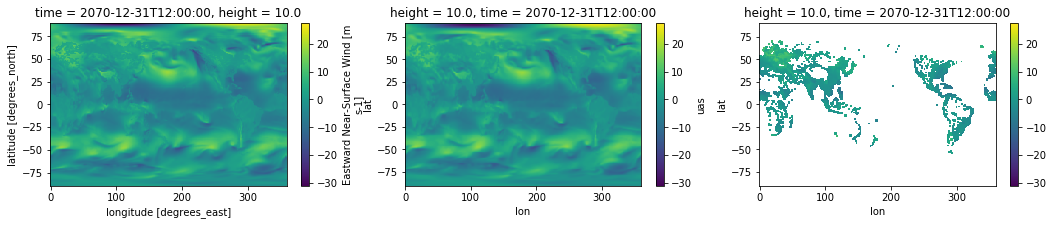

It takes elapsed_time 0.7381229400634766 to plot the layer
It takes elapsed_time 30.686097145080566 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/vas_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.728792667388916 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/vas_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 5.101573944091797 to load the data
*********Start to merge*********
It takes elapsed_time 8.766810894012451 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.05073189735412598 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.085461378097534 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6567258834838867 to mask the layer
*********Start to plot the layer*********


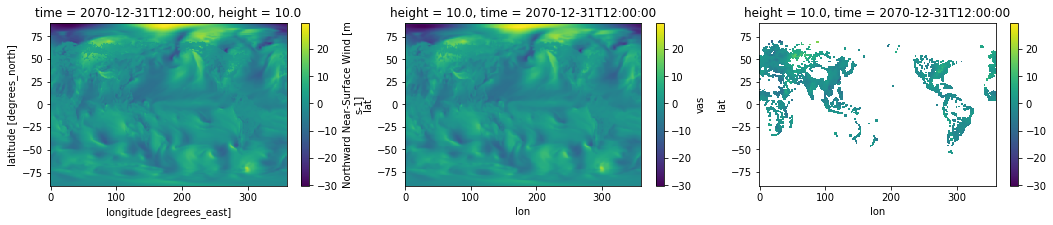

It takes elapsed_time 0.7408144474029541 to plot the layer
It takes elapsed_time 28.40341019630432 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/pr_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 2.220407009124756 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/pr_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 4.0213305950164795 to load the data
*********Start to merge*********
It takes elapsed_time 8.654551029205322 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03152012825012207 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.069881200790405 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6568732261657715 to mask the layer
*********Start to plot the layer*********


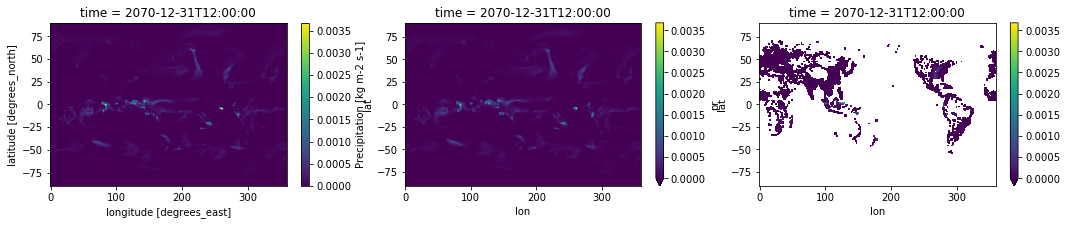

It takes elapsed_time 0.6946096420288086 to plot the layer
It takes elapsed_time 27.12961196899414 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/prsn_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 2.0526957511901855 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/prsn_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.978938579559326 to load the data
*********Start to merge*********
It takes elapsed_time 8.69090986251831 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.0878148078918457 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.18364667892456 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6558670997619629 to mask the layer
*********Start to plot the layer*********


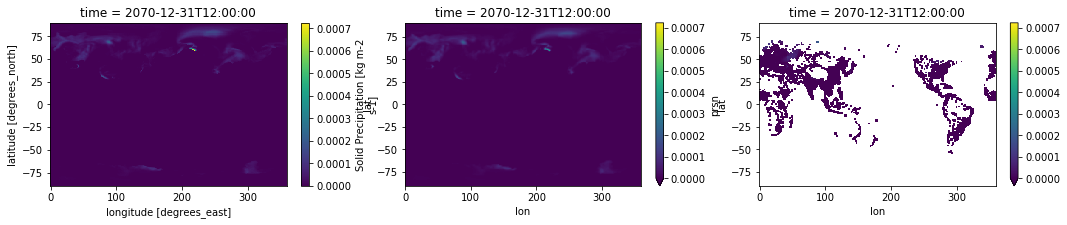

It takes elapsed_time 0.6858241558074951 to plot the layer
It takes elapsed_time 27.283878564834595 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rlds_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.5235421657562256 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rlds_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.980604887008667 to load the data
*********Start to merge*********
It takes elapsed_time 8.583976030349731 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03220367431640625 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.157743215560913 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6581666469573975 to mask the layer
*********Start to plot the layer*********


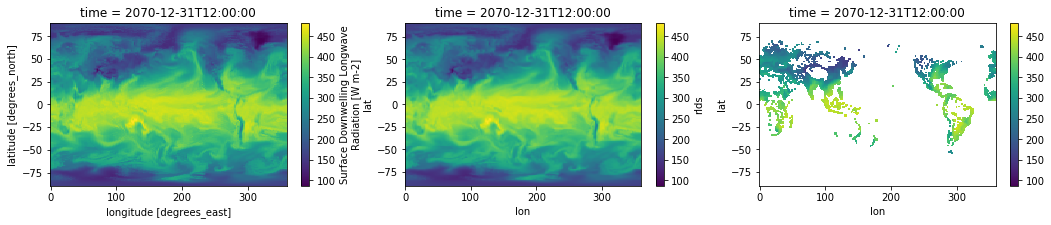

It takes elapsed_time 0.743070125579834 to plot the layer
It takes elapsed_time 27.156609535217285 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rlus_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.6866908073425293 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rlus_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 3.4360876083374023 to load the data
*********Start to merge*********
It takes elapsed_time 8.649819135665894 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.09836840629577637 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.123149156570435 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6560244560241699 to mask the layer
*********Start to plot the layer*********


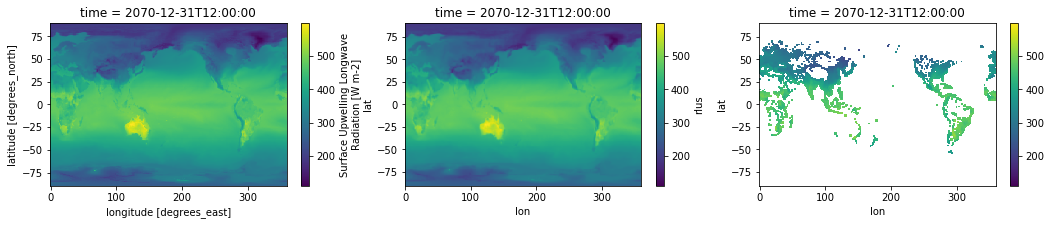

It takes elapsed_time 0.721454381942749 to plot the layer
It takes elapsed_time 26.68712615966797 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rsds_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.1504387855529785 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rsds_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 2.6588709354400635 to load the data
*********Start to merge*********
It takes elapsed_time 8.582657814025879 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.058185577392578125 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.104431629180908 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6513829231262207 to mask the layer
*********Start to plot the layer*********


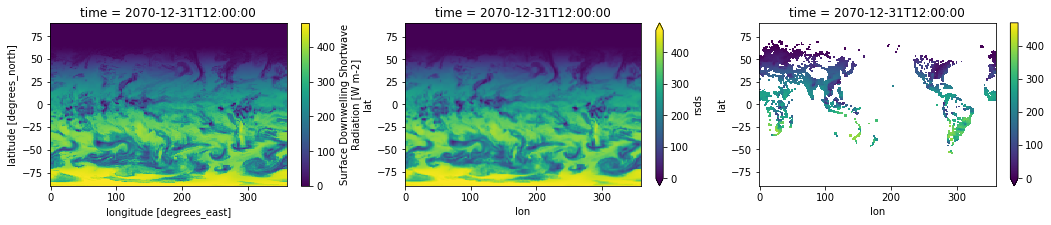

It takes elapsed_time 0.7033290863037109 to plot the layer
It takes elapsed_time 25.759961128234863 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rsus_day_MRI-CGCM3_rcp85_r1i1p1_20560101-20651231.nc
It takes elapsed_time 1.2145717144012451 to load the data
/glade/scratch/zhonghua/CMIP5/MRI-CGCM3/rsus_day_MRI-CGCM3_rcp85_r1i1p1_20660101-20751231.nc
It takes elapsed_time 2.7569031715393066 to load the data
*********Start to merge*********
It takes elapsed_time 8.569087982177734 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_160x320_192x288_peri.nc
It takes elapsed_time 0.03292131423950195 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 13.162948608398438 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6605925559997559 to mask the layer
*********Start to plot the layer*********


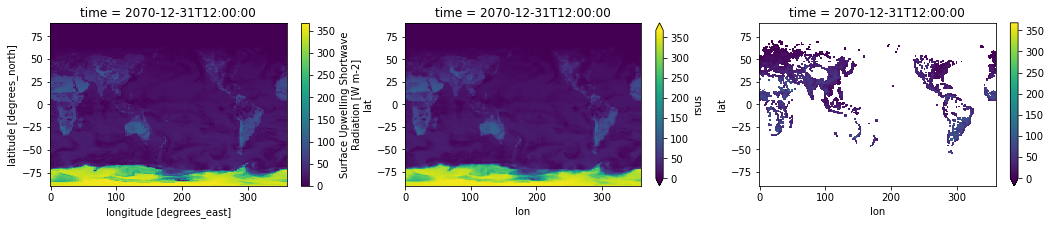

It takes elapsed_time 0.7309141159057617 to plot the layer
It takes elapsed_time 25.914918661117554 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2056, 2076, 10)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 32.693586349487305 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

231.52191138267517
